# Рубежный контроль №1 (Денисов Алексей, ИУ5-25М)

Импорт библиотек и чтение данных, а также вывод колонок датасета.

In [199]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from category_encoders.woe import WOEEncoder as ce_WOEEncoder
from sklearn.datasets import load_breast_cancer

pdata = pd.read_csv('Babies.csv', sep=",")
hdata = pd.read_csv('Game Sales.csv', sep=",")

In [201]:
list(zip(pdata.columns, [i for i in pdata.dtypes]))

[('case', dtype('int64')),
 ('bwt', dtype('int64')),
 ('gestation', dtype('float64')),
 ('parity', dtype('int64')),
 ('age', dtype('float64')),
 ('height', dtype('float64')),
 ('weight', dtype('float64')),
 ('smoke', dtype('int64'))]

In [202]:
list(zip(hdata.columns, [i for i in hdata.dtypes]))

[('Name', dtype('O')),
 ('Year_of_Release', dtype('int64')),
 ('Genre', dtype('O')),
 ('Publisher', dtype('O')),
 ('NA_Sales', dtype('float64')),
 ('EU_Sales', dtype('float64')),
 ('JP_Sales', dtype('float64')),
 ('Other_Sales', dtype('float64')),
 ('Global_Sales', dtype('float64')),
 ('Critic_Score', dtype('int64')),
 ('Critic_Count', dtype('int64')),
 ('User_Score', dtype('float64')),
 ('User_Count', dtype('int64')),
 ('Developer', dtype('O')),
 ('Rating', dtype('O'))]

## Задача №3. Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "weight of evidence (WoE) encoding".

In [203]:
ce_WOEEncoder1 = ce_WOEEncoder()
data_WOE_ENC = ce_WOEEncoder1.fit_transform(pdata[pdata.columns.difference(['smoke'])], pdata['smoke'])
data_WOE_ENC

,age,bwt,case,gestation,height,parity,weight
0,27.0,120,1,284.0,62.0,0,100.0
1,33.0,113,2,282.0,64.0,0,135.0
2,28.0,128,3,279.0,64.0,0,115.0
3,36.0,123,4,NaN,69.0,0,190.0
4,23.0,108,5,282.0,67.0,0,125.0
...,...,...,...,...,...,...,...
1221,27.0,113,1232,275.0,60.0,1,100.0
1222,24.0,128,1233,265.0,67.0,0,120.0
1223,30.0,130,1234,291.0,65.0,0,150.0
1224,21.0,125,1235,281.0,65.0,1,110.0


Проверка для поля "gestation"

In [204]:
def check_woe_encoding(field):
    data_ones = pdata[pdata['smoke'] == 1].shape[0]
    data_zeros = pdata[pdata['smoke'] == 0].shape[0]
    for s in pdata[field].unique():
        data_filter = pdata[pdata[field]==s]
        if data_filter.shape[0] > 0:
            filter_data_ones = data_filter[data_filter['smoke'] == 1].shape[0]
            filter_data_zeros = data_filter[data_filter['smoke'] == 0].shape[0]
            good = filter_data_ones / data_ones
            bad = filter_data_zeros / data_zeros
            if (bad == 0):
              bad = 10E-5
            woe = np.log(good/bad)
            print(s, '-' , woe)

check_woe_encoding('gestation')

284.0 - -0.15255415880219328
282.0 - -0.08356128731524184
279.0 - 0.373197115180473
286.0 - 0.1821418784177638
244.0 - -0.26588284410919666
245.0 - 1.5258766251188585
289.0 - -0.2658828441091965
299.0 - -0.8254986320446192
351.0 - -inf
281.0 - -0.2658828441091965
273.0 - -0.06917254986314225
285.0 - -0.11173216428193829
255.0 - 0.20412078513653903
261.0 - 0.13958226399896775
288.0 - -0.7513906598908973
270.0 - 0.19087555838651846
274.0 - 0.5384899715609732
287.0 - 0.02179922834258436
276.0 - -0.2658828441091965
294.0 - 0.07058939251201637
280.0 - 0.5182361146564753
266.0 - 0.5607957290752714
292.0 - -0.008053734807096827
278.0 - 0.4272643364507488
268.0 - 0.24494277965679415
275.0 - 0.16943522714864892
283.0 - -0.15255415880219328
267.0 - 0.4272643364507487
293.0 - -0.46003885855015403
302.0 - 0.02179922834258436
248.0 - -0.26588284410919666
272.0 - 0.09079209982953583
291.0 - -0.8536695090113154
258.0 - -1.1821735759833516
257.0 - -0.671347952217361
232.0 - 1.120411517010694
246.0 - -

<ipython-input-204-8b21eab758ca>:13: RuntimeWarning: divide by zero encountered in log
  woe = np.log(good/bad)


 - -0.959030024669142
241.0 - 0.4272643364507487
247.0 - 1.120411517010694
240.0 - -inf
250.0 - -inf
309.0 - -inf
316.0 - -inf
237.0 - -inf
259.0 - -inf
229.0 - -inf
242.0 - 3.7214026458194964
330.0 - 3.7214026458194964
253.0 - 3.028255465259551
238.0 - 1.120411517010694
228.0 - -inf
224.0 - 3.028255465259551
181.0 - -inf
314.0 - 3.028255465259551
204.0 - -inf
324.0 - 3.028255465259551
312.0 - 3.7214026458194964
236.0 - -inf
311.0 - -inf
353.0 - -inf
338.0 - -inf
321.0 - -inf


## Задача №23. Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе правила трех сигм.

Построение графиков для колонки Year_of_Release (год выпуска).

<ipython-input-205-8775a38d6e46>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


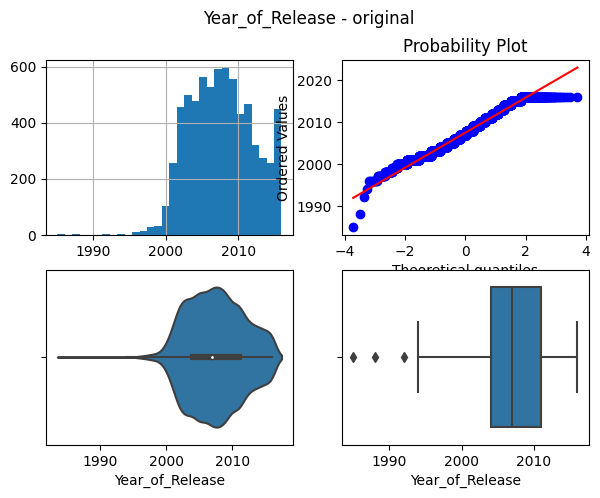

In [205]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(7,5))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

diagnostic_plots(hdata, 'Year_of_Release', 'Year_of_Release - original')

Применение правила трех сигм для удаления выбросов.

<ipython-input-205-8775a38d6e46>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


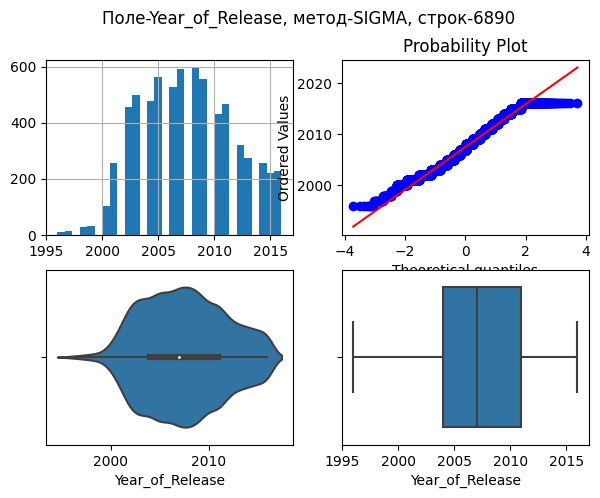

In [206]:
K1 = 3
# Вычисление верхней и нижней границы
lower_boundary = hdata['Year_of_Release'].mean() - (K1 * hdata['Year_of_Release'].std())
upper_boundary = hdata['Year_of_Release'].mean() + (K1 * hdata['Year_of_Release'].std())
# Флаги для удаления выбросов
outliers_temp = np.where(hdata['Year_of_Release'] > upper_boundary, True, np.where(hdata['Year_of_Release'] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = hdata.loc[~(outliers_temp)]  
title = 'Поле-{}, метод-{}, строк-{}'.format('Year_of_Release', 'SIGMA', data_trimmed.shape[0])
diagnostic_plots(data_trimmed, 'Year_of_Release', title)

## Pairplot для для колонки Year_of_Release (год выпуска).

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


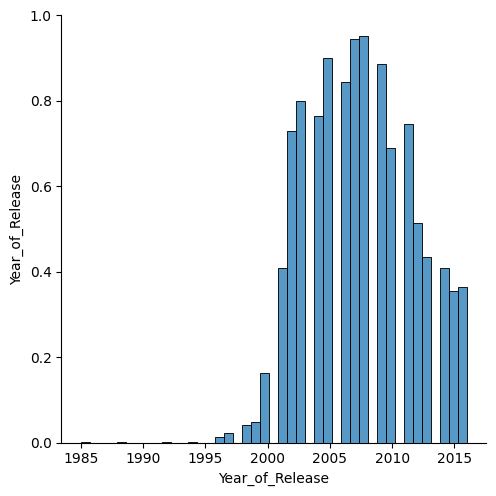

In [207]:
data_tmp = pd.DataFrame(hdata['Year_of_Release'])
sns.pairplot(data_tmp, size=5)  